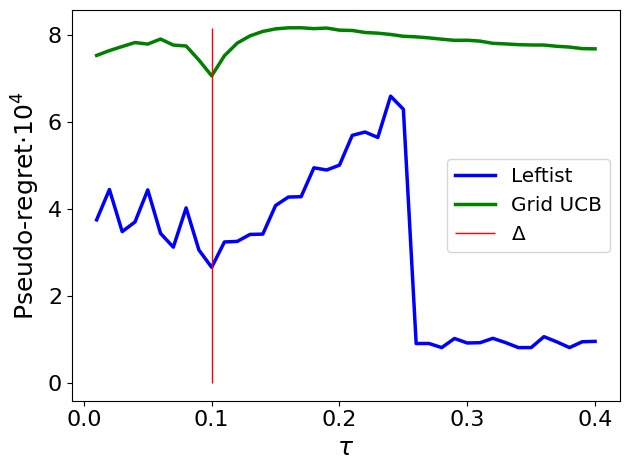

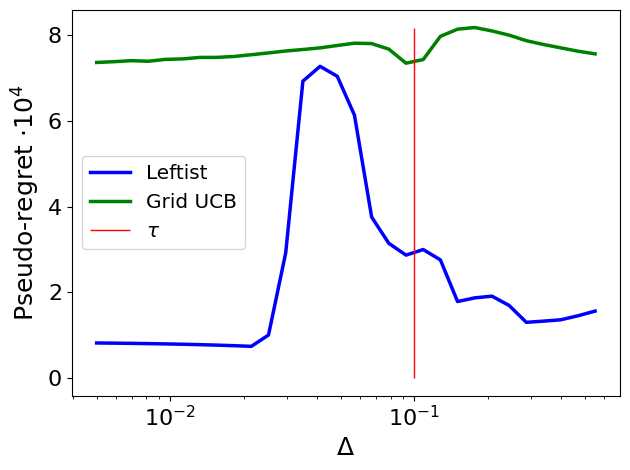

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results1 = np.loadtxt(open("Nishant/Exp1/exp1_saveddata.csv", "rb"), delimiter=",", skiprows=1)
results2 = np.loadtxt(open("Nishant/exp2_leftist.csv", "rb"), delimiter=",", skiprows=1)
results3 = np.loadtxt(open("Nishant/Exp1/exp1_grid_UCB.csv", "rb"), delimiter=",", skiprows=1)
results4 = np.loadtxt(open("Nishant/exp2_grid_UCB.csv", "rb"), delimiter=",", skiprows=1)
results5 = np.loadtxt(open("Nishant/exp2_EG.csv", "rb"), delimiter=",", skiprows=1)

# Make sure x and reps match the ones that are set in TLB_Exp.py 
# when you collected the experimental results

reps=25
x=40
T=1000000
x2=30

# Leftist Exp 1
df = pd.DataFrame(results1[:,5])
leftist_exp1 = ((df.groupby(np.arange(len(df))//reps).mean())/10000).to_numpy()

# Grid UCB Exp 1
df2 = pd.DataFrame(results3[:,2])
GUCB_exp1 = ((df2.groupby(np.arange(len(df2))//reps).mean())/10000).to_numpy()

# Leftist Exp 2
df3 = pd.DataFrame(results2[:,5])
leftist_exp2 = ((df3.groupby(np.arange(len(df3))//reps).mean())/10000).to_numpy()

# Grid UCB Exp 2
df4 = pd.DataFrame(results4[:,2])
GUCB_exp2 = ((df4.groupby(np.arange(len(df4))//reps).mean())/10000).to_numpy()

# EG Exp 2
df5 = pd.DataFrame(results5[:,5])
EG_exp2 = ((df5.groupby(np.arange(len(df4))//reps).mean())/10000).to_numpy()

taulin = np.linspace(1e-2,0.4,x)
delta = np.geomspace(5e-3, 0.55, x2)    
static_delta = 0.1
static_tau = 0.1

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
# Experiment 1 plot    
plt.figure(1)
plt.plot(taulin,leftist_exp1,color= 'blue', linewidth = 2.5, label = "Leftist")
plt.plot(taulin,GUCB_exp1,color= 'green', linewidth = 2.5, label = "Grid UCB")
plt.xlabel(r"$\tau$", fontsize=18)
plt.ylabel(r"Pseudo-regret$\cdot 10^4$", fontsize=18)
plt.vlines(static_delta,0,np.max(GUCB_exp1),colors="red",linewidth=1, label=r"$\Delta$")
plt.legend(loc='center right',fontsize='x-large')
plt.tight_layout()
plt.savefig("Exp1_plot.pdf", format="pdf")

# Experiment 2 plot

plt.figure(3)
plt.plot(delta,leftist_exp2,color="blue", linewidth = 2.5, label = "Leftist")
plt.plot(delta,GUCB_exp2,color="green", linewidth = 2.5, label = "Grid UCB")
# plt.plot(delta,EG_exp2,color="black", label = "EG")
plt.vlines(static_tau,0,np.max(GUCB_exp2),colors="red",linewidth=1, label = r"$\tau$")
plt.xlabel(r"$\Delta$", fontsize=18)
plt.xscale("log")
plt.ylabel(r"Pseudo-regret $\cdot 10^4$", fontsize=18)
plt.legend(loc='center left', fontsize='x-large')
plt.tight_layout()
plt.savefig("Nishant/Exp2_plot.pdf", format="pdf")
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tau_left = np.loadtxt(open("Experiments/exp3/tau_point1_p1_point3_p0_point25/tau_leftist3.csv", "rb"), delimiter=",", skiprows=1)
tau_gucb = np.loadtxt(open("Experiments/exp3/tau_point1_p1_point3_p0_point25/tau_grid3.csv", "rb"), delimiter=",", skiprows=1)
d_left = np.loadtxt(open("Experiments/exp3/experiment_3_tau_point2_p1_point55_p0_point25/delta_leftist3.csv", "rb"), delimiter=",", skiprows=1)
d_gucb = np.loadtxt(open("Experiments/exp3/experiment_3_tau_point2_p1_point55_p0_point25/delta_grid3.csv", "rb"), delimiter=",", skiprows=1)

reps=25
T=1000000
x3=6

time = np.geomspace(5, 160, x3, dtype=int)
# Leftist Exp 1
tau_l = pd.DataFrame(tau_left[:,5])
leftist_tau = ((tau_l.groupby(np.arange(len(tau_l))//reps).mean())/100000).to_numpy()

# Leftist Exp 1
d_l = pd.DataFrame(d_left[:,5])
leftist_d = ((d_l.groupby(np.arange(len(d_l))//reps).mean())/100000).to_numpy()

# Grid UCB Exp 1
tau_g = pd.DataFrame(tau_gucb[:,2])
GUCB_tau = ((tau_g.groupby(np.arange(len(tau_g))//reps).mean())/100000).to_numpy()

d_g = pd.DataFrame(d_gucb[:,2])
GUCB_d = ((d_g.groupby(np.arange(len(d_g))//reps).mean())/100000).to_numpy()

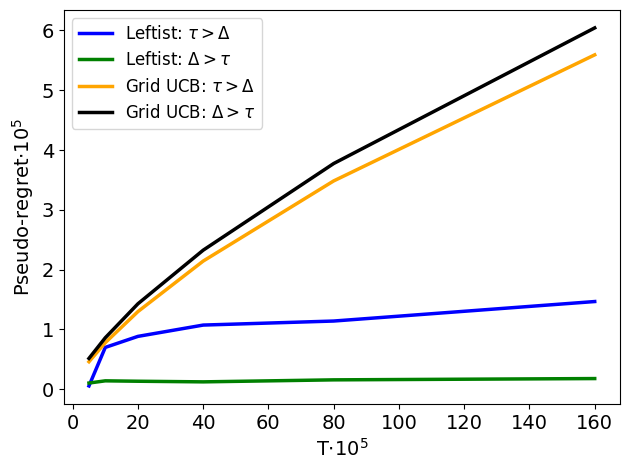

In [8]:
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.figure(1)
plt.plot(time,leftist_tau,color= 'blue', linewidth = 2.5, label = r"Leftist: $\tau > \Delta$")
plt.plot(time,leftist_d,color= 'green', linewidth = 2.5, label = r"Leftist: $\Delta > \tau$")
plt.plot(time,GUCB_tau,color= 'orange', linewidth = 2.5, label = r"Grid UCB: $\tau > \Delta$")
plt.plot(time,GUCB_d,color= 'black', linewidth = 2.5, label = r"Grid UCB: $\Delta > \tau$")
plt.xlabel(r"T$\cdot 10^5$", fontsize=14)
plt.ylabel(r"Pseudo-regret$\cdot 10^5$", fontsize=18)
plt.legend(loc="best",fontsize='large')
plt.tight_layout()
plt.savefig("time_plot.pdf", format="pdf")